## ATL03 data dawnload

This notebook is for downloading the ATL03 data for Unsupervised Surface Classification procject at Hackweek 2020.

**This file must be finished downloading the correct variables, currently sigma_h is downloaded**

### Reading in the modules

In [2]:
from icepyx import icesat2data as ipd
import os
import shutil
from pprint import pprint
%matplotlib inline

### Specify data with inputs

Here the middle of Greenland Ice Sheet is chosen, hopefully the signal will be related only to snow or firn, no rocks. Additionally, the time period is set ending 2 weeks before the first melt event of 2019.

In [13]:
# somewhere middle of GIS
short_name = 'ATL03'
spatial_extent = [-38.5, 75.5, -36.5, 76.5] #long_min, long_max, lat_min, lat_max
date_range = ['2019-05-22','2019-06-01']

Populating data object:

In [14]:
region_gis = ipd.Icesat2Data(short_name, spatial_extent, date_range)

Reading the objects properties:

In [15]:
print(region_gis.dataset)
print(region_gis.dates)
print(region_gis.start_time)
print(region_gis.end_time)
print(region_gis.dataset_version)
print(region_gis.spatial_extent)

ATL03
['2019-05-22', '2019-06-01']
00:00:00
23:59:59
003
['bounding box', [-38.5, 75.5, -36.5, 76.5]]


Visualise the extend:

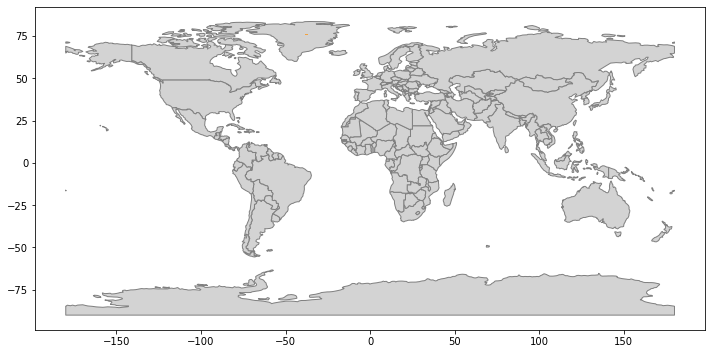

In [16]:
region_gis.visualize_spatial_extent()

Reading the overview info of the available data:

In [18]:
region_gis.dataset_summary_info()

dataset_id :  ATLAS/ICESat-2 L2A Global Geolocated Photon Data V003
short_name :  ATL03
version_id :  003
time_start :  2018-10-13T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL03) contains height above the WGS 84 ellipsoid (ITRF2014 reference frame), latitude, longitude, and time for all photons downlinked by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory. The ATL03 product was designed to be a single source for all photon data and ancillary information needed by higher-level ATLAS/ICESat-2 products. As such, it also includes spacecraft and instrument parameters and ancillary data not explicitly required for ATL03.
orbit_parameters :  {'swath_width': '36.0', 'period': '94.29', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}


The all the details about available data:

In [20]:
region_gis.dataset_all_info()

{'feed': {'entry': [{'archive_center': 'NASA NSIDC DAAC',
                     'associations': {'services': ['S1568899363-NSIDC_ECS',
                                                   'S1613669681-NSIDC_ECS',
                                                   'S1613689509-NSIDC_ECS']},
                     'boxes': ['-90 -180 90 180'],
                     'browse_flag': False,
                     'coordinate_system': 'CARTESIAN',
                     'data_center': 'NSIDC_ECS',
                     'dataset_id': 'ATLAS/ICESat-2 L2A Global Geolocated '
                                   'Photon Data V002',
                     'has_formats': True,
                     'has_spatial_subsetting': True,
                     'has_temporal_subsetting': True,
                     'has_transforms': False,
                     'has_variables': True,
                     'id': 'C1631076758-NSIDC_ECS',
                     'links': [{'href': 'https://n5eil01u.ecs.nsidc.org/ATLAS/ATL03.002/',
  

Now, we review the specified parameters and then check how many and which granules are available for download. 

In [26]:
#reviewing parameters
region_gis.CMRparams

{'short_name': 'ATL03',
 'version': '003',
 'temporal': '2019-05-22T00:00:00Z,2019-06-01T23:59:59Z',
 'bounding_box': '-38.5,75.5,-36.5,76.5'}

In [27]:
#checking how many granules
region_gis.avail_granules()

{'Number of available granules': 5,
 'Average size of granules (MB)': 3187.5103746413997,
 'Total size of all granules (MB)': 15937.551873207}

In [28]:
#checking what granules
region_gis.avail_granules(ids=True)

['ATL03_20190522064950_08250303_003_01.h5',
 'ATL03_20190525195203_08790305_003_01.h5',
 'ATL03_20190526064130_08860303_003_01.h5',
 'ATL03_20190529194342_09400305_003_01.h5',
 'ATL03_20190530063310_09470303_003_01.h5']

In [29]:
#print detailed information about the returned search results
region_gis.granules.avail

[{'producer_granule_id': 'ATL03_20190522064950_08250303_003_01.h5',
  'time_start': '2019-05-22T06:49:52.000Z',
  'orbit': {'ascending_crossing': '-22.449472196227994',
   'start_lat': '59.5',
   'start_direction': 'A',
   'end_lat': '80',
   'end_direction': 'A'},
  'updated': '2020-05-04T16:34:05.922Z',
  'orbit_calculated_spatial_domains': [{'equator_crossing_date_time': '2019-05-22T06:34:18.301Z',
    'equator_crossing_longitude': '-22.449472196227994',
    'orbit_number': '3800'}],
  'dataset_id': 'ATLAS/ICESat-2 L2A Global Geolocated Photon Data V003',
  'data_center': 'NSIDC_ECS',
  'title': 'SC:ATL03.003:177292034',
  'coordinate_system': 'ORBIT',
  'time_end': '2019-05-22T06:55:12.000Z',
  'id': 'G1721696247-NSIDC_ECS',
  'original_format': 'ISO-SMAP',
  'granule_size': '1966.4286241531',
  'browse_flag': True,
  'polygons': [['59.363135691245354 -30.03996539229416 78.32396263533637 -38.13328447157254 79.57172628019077 -39.525524727776485 79.63437062477372 -37.764338637297605 

### Downloading data

First log in to NASA Earthdata.

In [31]:
# Fill this in with your Earthdata Login user name and associated email

earthdata_uid = 'kmsejan'
email = 'k.m.sejan@uu.nl'
region_gis.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ·············


Printing the names of parameters in the granules:

In [41]:
region_gis.order_vars.avail(options=True)

var_list inputs: ds_surf_type, ds_xyz, atlas_sdp_gps_epoch, control, data_end_utc, data_start_utc, end_cycle, end_delta_time, end_geoseg, end_gpssow, end_gpsweek, end_orbit, end_region, end_rgt, granule_end_utc, granule_start_utc, release, start_cycle, start_delta_time, start_geoseg, start_gpssow, start_gpsweek, start_orbit, start_region, start_rgt, version, atl03_pad, band_tol, min_full_sat, min_near_sat, min_sat_h, podppd_pad, det_ab_flag, ds_gt, ds_stat, hvpc_ab_flag, laser_12_flag, lrs_ab_flag, pdu_ab_flag, ph_uncorrelated_error, spd_ab_flag, tams_ab_flag, rx_bckgrd_sensitivity, rx_return_sensitivity, tx_pulse_distribution, tx_pulse_energy, tx_pulse_skew_est, tx_pulse_thresh_lower, tx_pulse_thresh_upper, tx_pulse_width_lower, tx_pulse_width_upper, ds_channel, cal42_product, side, temperature, gt1l, gt1r, gt2l, gt2r, gt3l, gt3r, cal34_product, cal19_product, bin_width, cal20_product, hist_x, laser, mode, num_bins, return_source, addpad_flag, alpha_inc, alpha_max, delta_t_gap_min, de

From the above list we would probably want to look at the heights for each of the tracks (gt). 

In [53]:
#creating a variable list
region_gis.order_vars.append(var_list=['sigma_lon', 'sigma_lat', 'sigma_h', 'surf_type'])
pprint(region_gis.order_vars.wanted)

{'atlas_sdp_gps_epoch': ['ancillary_data/atlas_sdp_gps_epoch'],
 'data_end_utc': ['ancillary_data/data_end_utc'],
 'data_start_utc': ['ancillary_data/data_start_utc'],
 'end_delta_time': ['ancillary_data/end_delta_time'],
 'granule_end_utc': ['ancillary_data/granule_end_utc'],
 'granule_start_utc': ['ancillary_data/granule_start_utc'],
 'sc_orient': ['orbit_info/sc_orient'],
 'sc_orient_time': ['orbit_info/sc_orient_time'],
 'sigma_h': ['gt1l/geolocation/sigma_h',
             'gt1r/geolocation/sigma_h',
             'gt2l/geolocation/sigma_h',
             'gt2r/geolocation/sigma_h',
             'gt3l/geolocation/sigma_h',
             'gt3r/geolocation/sigma_h'],
 'sigma_lat': ['gt1l/geolocation/sigma_lat',
               'gt1r/geolocation/sigma_lat',
               'gt2l/geolocation/sigma_lat',
               'gt2r/geolocation/sigma_lat',
               'gt3l/geolocation/sigma_lat',
               'gt3r/geolocation/sigma_lat'],
 'sigma_lon': ['gt1l/geolocation/sigma_lon',
         

Passing the wanted variables to order specification:

In [56]:
region_gis.subsetparams(Coverage=region_gis.order_vars.wanted)

{'time': '2019-05-22T00:00:00,2019-06-01T23:59:59',
 'bbox': '-38.5,75.5,-36.5,76.5',
 'Coverage': '/orbit_info/sc_orient,/orbit_info/sc_orient_time,/ancillary_data/atlas_sdp_gps_epoch,/ancillary_data/data_start_utc,/ancillary_data/data_end_utc,/ancillary_data/granule_start_utc,/ancillary_data/granule_end_utc,/ancillary_data/start_delta_time,/ancillary_data/end_delta_time,/gt1l/geolocation/sigma_lon,/gt1r/geolocation/sigma_lon,/gt2l/geolocation/sigma_lon,/gt2r/geolocation/sigma_lon,/gt3l/geolocation/sigma_lon,/gt3r/geolocation/sigma_lon,/gt1l/geolocation/sigma_lat,/gt1r/geolocation/sigma_lat,/gt2l/geolocation/sigma_lat,/gt2r/geolocation/sigma_lat,/gt3l/geolocation/sigma_lat,/gt3r/geolocation/sigma_lat,/gt1l/geolocation/sigma_h,/gt1r/geolocation/sigma_h,/gt2l/geolocation/sigma_h,/gt2r/geolocation/sigma_h,/gt3l/geolocation/sigma_h,/gt3r/geolocation/sigma_h,/gt1l/geolocation/surf_type,/gt1r/geolocation/surf_type,/gt2l/geolocation/surf_type,/gt2r/geolocation/surf_type,/gt3l/geolocation/sur

### Order Data

Place na order:

In [57]:
region_gis.order_granules()

Total number of data order requests is  1  for  5  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000000700638
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is:  complete_with_errors
NSIDC provided these error messages:
['177292034:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '177246488:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '177247524:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 'PT6.856S',
 'ICESAT2']
Your order is: complete_with_errors


In [59]:
# View a short list of order IDs:
region_gis.granules.orderIDs

['5000000700638']

Download the order:

In [61]:
path = './download'

# without variable subsetting, or with variable subsetting if you have run region_a.order_granules(Coverage=region_a.order_vars.wanted)
region_gis.download_granules(path)

Beginning download of zipped output...
Data request 5000000700638 of  1  order(s) is downloaded.
Download complete


Check if the granules are in the download folder.